In [ ]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
import networkx as nx
import matplotlib.pyplot as plt
import os

In [ ]:
file_path = r"C:\Users\USER\OneDrive\Escritorio\Universidad Salomé\semillero\Proyecto\Grafos\base_mol2.mol2"
if os.path.exists(file_path):
    print("El archivo existe y está accesible.")
else:
    print("El archivo NO existe o la ruta es incorrecta.")

El archivo existe y está accesible.


In [ ]:
file_path = r"C:\Users\USER\OneDrive\Escritorio\Universidad Salomé\semillero\Proyecto\Grafos\base_mol2.mol2"
with open(file_path, "r") as f:
    mol2_block = f.read()
mol = Chem.MolFromMol2Block(mol2_block, sanitize=True, removeHs=False)
if mol:
    print("✅ Archivo .mol2 cargado correctamente en RDKit")
else:
    print("❌ Error al cargar el archivo .mol2 en RDKit")

✅ Archivo .mol2 cargado correctamente en RDKit


#### **En esta parte solo estamos viendo una**

In [ ]:
G = nx.Graph()
for atom in mol.GetAtoms():
    G.add_node(atom.GetIdx(), 
               element=atom.GetSymbol(), 
               charge=atom.GetFormalCharge())
for bond in mol.GetBonds():
    G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), 
               order=bond.GetBondTypeAsDouble())  # 1.0 (simple), 2.0 (doble), etc.
# Mostrar información del grafo
print(f"📌 Número de nodos (átomos): {G.number_of_nodes()}")
print(f"📌 Número de aristas (enlaces): {G.number_of_edges()}")


📌 Número de nodos (átomos): 44
📌 Número de aristas (enlaces): 45


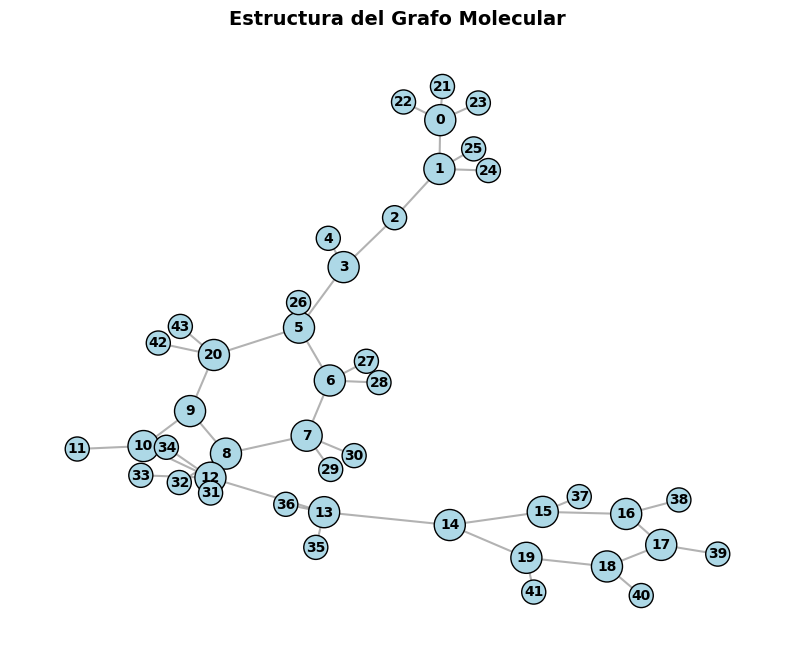

In [19]:

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Diseño más estético
node_sizes = [500 if G.degree(n) > 2 else 300 for n in G.nodes()]  # Tamaño según grado
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue", edgecolors="black")
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")
plt.title("Estructura del Grafo Molecular", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()


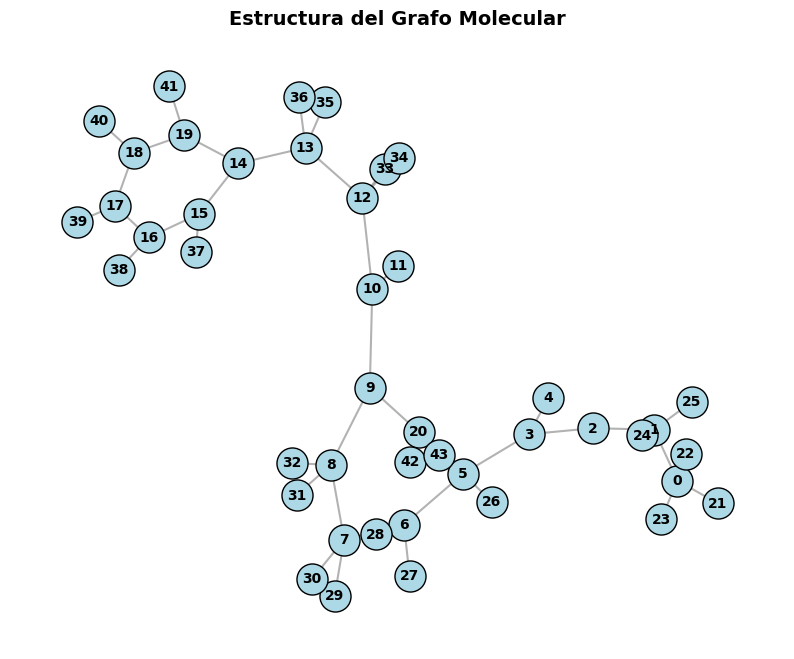

In [20]:
pos = nx.spring_layout(G, seed=0)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightblue", edgecolors="black")
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")
plt.title("Estructura del Grafo Molecular", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()


#### **Para todas y que se guarden en una carpeta sería**

**NOO EJECUTAR**

In [ ]:
#mol2_folder = r"C:\Users\USER\OneDrive\Escritorio\Universidad Salomé\semillero\Proyecto\Grafos\moleculas_mol2"
#output_folder = r"C:\Users\USER\OneDrive\Escritorio\Universidad Salomé\semillero\Proyecto\Grafos\grafos"
#os.makedirs(output_folder, exist_ok=True)
#for file_name in os.listdir(mol2_folder):
#    if file_name.endswith(".mol2"):
#        file_path = os.path.join(mol2_folder, file_name)
#        with open(file_path, "r") as f:
#            mol2_block = f.read()
#        mol = Chem.MolFromMol2Block(mol2_block, sanitize=True, removeHs=False)
#        if mol is None:
#            print(f"❌ Error al procesar {file_name}")
#            continue
#        G = nx.Graph()
#        for atom in mol.GetAtoms():
#            G.add_node(atom.GetIdx(), element=atom.GetSymbol(), charge=atom.GetFormalCharge())
#
#        for bond in mol.GetBonds():
#            G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(),
#                       order=bond.GetBondTypeAsDouble())
#        graph_file = os.path.join(output_folder, file_name.replace(".mol2", ".graphml"))
#       nx.write_graphml(G, graph_file)
#
#        print(f"✅ Guardado: {graph_file}")